# Statistics, Machine Learning, Train delay and Arrested Development!

Was preparing content for an Analytics class I am taking and had some interesting discussions with folks on real-world usecases and all the jargon like Supervised, Unsupervised, p-Value, Z-score, Hypothesis testing, Training/Test dataets, Correlations and more. I felt like consolidationg my learnings and sharing with larger community. Mainly to get your feedback and opinions and see if I got anything wrong (very possible). I walk through a real-world example on how we could apply these concepts in relation to a Train journey I recently took with family.  Feel free to let me know thoughts in comments and do correct anything I got wrong. And about the Arrested Development connection...keep reading!

![title](Dudhsagar_dabhdhaba_5.jpg)

Lets start with some basics. The objective of Analytics is to answer questions with Data. There are 4 types of questions we want to answer and thus there are 4 types of Analytics (consolidated by a Gartner study)
* Descriptive - What just happened?
* Diagnostic - Why did it happen?
* Predictive - Will it happen again?
* Prescriptive - What to do when it happens?

Let me take an example of a Train journey, collect some data and show how each of these questions may be answered. Why train journey - simply because the idea of this post came to me when I took a family trip to Mysore from Bangalore on Indian Railways Train #12007 - Shatabdi express. Just as everyone, I was curious if my train will be delayed and what are reasons for it. So decided to collect some data and run statistics to see what the Data tells us.

## Data collection

As most Data Scientists believe data collection and organization is the most tdious task and takles up almost 80% time. For this problem, I looked up Indian Railways (IR) website for historical train arrival times - intended and actual. Luckily IR provides its data at data.gov.in from where I could download 2017 history for my Train 12007. there were a few blanks in data which I omitted using Excel. Also used Excel to find the Delay time and weekday information and created a CSV file for processing in Python. With that I got started on my Data processing journey.

## 1. Descriptive Analytics

First step is to just look at data and see what it tell us. Let the Data talk to us. The tool we use for this is Descriptive Statistics. We can build fancy charts and see trends, etc. But for this one I just decided to use Pandas to import and look at the data.

In [113]:
# Pandas is my favourite tool for Data loading and munging
import pandas as pd

delays = pd.read_csv('IRTrain_12007_2017_delays.csv')
delays.head(5)

,DATE,WEEKDAY,DELAY
0,01/01/17,2,25
1,02/01/17,3,30
2,03/01/17,5,10
3,05/01/17,6,20
4,06/01/17,1,30


In [114]:
# descriptive analytics on the data
delays.describe()["DELAY"]

count    300.000000
mean      19.193333
std       13.731148
min        0.000000
25%       10.000000
50%       15.000000
75%       29.250000
max       70.000000
Name: DELAY, dtype: float64

## Interpreting the Data

So we describe our dataset specifically the DELAYS field/variable. We see 300 records with good data in 2017 - with mean delay of 19 minutes and maximum delay of 70 minutes. Ok now lets ask some in-depth questions to our Data. Now we have collected very little data for this study so results may not be fully accurate - but the concepts are valid for any size data sets.


## 2. Diagnostic Analytics

Now, I want to know what causes delays for this Train. Does the day of the week play a role in delays. Maybe on Tuesday when Train 12007 runs from Bangalore to Mysore - there is a higher Train traffic or a particular Train pilot due to which delay is more. So lets again use Descriptive Statistics to see of this is the case.

In [115]:
# Group the delays by WEEKDAY and find the statistics
delays.groupby('WEEKDAY').agg({'DELAY':{'count', 'mean'}})

DELAY      
              mean count
WEEKDAY                 
1        20.588235    51
2        15.803922    51
3        21.788462    52
5        17.224490    49
6        18.489796    49
7        21.229167    48

Interesting, so now we see that Delays by days are pretty standard expect for Tuesday where the delay is least. So maybe Tuesday is a good day to Travel to Mysore with least delay - hey we are already making decisions!

But do we have enough evidence to say this is True. In other words - can we Statistically prove that delays are less on Tuesday? Lets try to answer this question using Inferential Statistics.

## Inferential Statistics

This is basically drawing inferences on Population of data using Sampling. Idea is to make a claim/statement and collect data to acceopt or reject it. The method of doing this called Hypothesis testing. So in this method we first establish a Null hypothesis which is the status quo or business as usual. 

So our Null hypothesis is that nothing is different on Tuesday and average delay should be same as delay on any day. Now keep in mind - the mean delay we see above of 15 on Tuesday is the sample delay. Our Null hypothesis is talking about the Population - that is - all the years when this Train was running. So in Hypothesis testing we collect samples to make inferences on the Population.

Null Hypothesis = Average delay on Tuesday is the mean of all days = <b>19.19</b> minutes <br>
Alternate Hypothesis = Average delay on Tuesday < <b>19.19</b>

The technique we will use here is called p-Value testing. p-Value basically is the probablity of getting these results from the sample assuming Null hypothesis is true. So if Null hypothesis is true then Tuesday will have the same statistics as any other day - that is - delay on Tuesday has a mean <b>19.19</b> and standard deviation <b>13.73</b>. Now the sample we collected has <b>51</b> points and sample mean of <b>15.803</b>. Lets get cracking on the p-Value.

We first calculate a Z-score and then get p-Value for it. We will keep a threshold value of 0.05. That means we allow a threshold of 5% probability of getting results as per the Alternate hypothesis (avg delay < 19.19) by chance. 

\begin{align}
Z score = \frac{(\overline{X} - \mu )}{(\sigma / \sqrt{N})} \\
\\
\overline{X} = Sample \, mean\\
\mu = Population \, mean\\
\sigma = Population \, standard \, deviation\\
N = Number \, of \, samples\\
\end{align}

In [116]:
import scipy.stats as stats
import numpy as np

zscore = (15.803 - 19.19) / (51 * np.sqrt(13.73))
pvalue = stats.norm.cdf(zscore)

print("P-Value for this test is %.3f" % pvalue)

P-Value for this test is 0.493


## Interpretating the Results

So we have a very high p-Value of 0.493. Which means that we do not have enough data to say that Tuesdays will have a lesser delay. We will fail to reject the Null hypothesis. If this number was very small and less than our Threshold (0.05). In this case - the results would be <b>Statistically Significant</b> and the data will tell us to reject Null hypothesis. In other words - a small value will say that the sample we collected is not from the overall population. Lets move on and see what else we can learn from the Data.


## Getting more Data

So we see that the day of the week does not have a major influence on the delay. I think weather will definitely have some influence on the Train delays. So I went to weather underground and collected daily weather data for 2017 for Bangalore. Again had to cleanse the data and get it ready to start analysis. Now the Train runs between multiple cities - Chennai, Mysore and Bangalore. Ideally we should collect weather data from all - but just for keeping things simple I only collect from Banaglore. Also since the Train runs from morning to evening - average values for the day shall be good indicators to compare.

In [117]:
weather = pd.read_csv('Bangalore_2017_Daily_Weather.csv', skiprows=1)
weather.head(5)

,DATE,temp_high,temp_avg,temp_low,dewpt_high,dewpt_avg,dewpt_low,hum_high,hum_avg,hum_low,press_high,press_avg,press_low,vis_high,vis_avg,vis_low,wind_high,wind_avg
0,01/01/17,27,19,12,16,13,11,100,66,31,1019,1017,1014,10,6,0,19,8
1,02/01/17,28,22,16,16,13,10,88,56,28,1019,1017,1015,10,9,3,10,8
2,03/01/17,28,21,14,16,11,7,94,48,24,1019,1017,1014,10,6,3,14,6
3,04/01/17,28,21,15,14,12,10,88,53,32,1019,1016,1014,10,7,2,14,6
4,05/01/17,28,21,15,16,12,9,94,54,23,1018,1016,1014,10,7,3,14,6


## Data munging

Earlier we did most of our data munging in Excel. Lets do some in code. These are just some shortcuts I found useful. You can easily do this in Excel or some other tool. So first I check if any column has non-Numeric values and fill them with mean column values. Date obviously will show as having non-Numeric values. 

In [118]:
for column in weather.keys():
    has_nulls = pd.to_numeric(weather[column], errors='coerce').isnull().max()
    print ("Does '%s' have non-numeric values? %r" % (column, has_nulls))

Does 'DATE' have non-numeric values? True
Does 'temp_high' have non-numeric values? False
Does 'temp_avg' have non-numeric values? False
Does 'temp_low' have non-numeric values? False
Does 'dewpt_high' have non-numeric values? False
Does 'dewpt_avg' have non-numeric values? False
Does 'dewpt_low' have non-numeric values? False
Does 'hum_high' have non-numeric values? False
Does 'hum_avg' have non-numeric values? False
Does 'hum_low' have non-numeric values? False
Does 'press_high' have non-numeric values? True
Does 'press_avg' have non-numeric values? True
Does 'press_low' have non-numeric values? True
Does 'vis_high' have non-numeric values? False
Does 'vis_avg' have non-numeric values? False
Does 'vis_low' have non-numeric values? False
Does 'wind_high' have non-numeric values? False
Does 'wind_avg' have non-numeric values? False


In [119]:
# We see 3 variables with non-numeric values : press_high, press_avg, press_low
# So i write a function that will remove non-numerics and pout mean column values
def removeDashes(dataframe):
    dataframe = pd.to_numeric(dataframe, errors='coerce')
    dmean = dataframe.mean()
    return dataframe.fillna(dmean)

weather['press_high'] = removeDashes(weather['press_high'])
weather['press_avg'] = removeDashes(weather['press_avg'])
weather['press_low'] = removeDashes(weather['press_low'])

In [120]:
weather.describe()

,temp_high,temp_avg,temp_low,dewpt_high,dewpt_avg,dewpt_low,hum_high,hum_avg,hum_low,press_high,press_avg,press_low,vis_high,vis_avg,vis_low,wind_high,wind_avg
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,29.660274,24.090411,18.731507,19.583562,17.515068,15.317808,87.906849,65.531507,41.304110,1014.762821,1013.743590,1012.660256,8.947945,5.627397,2.632877,18.156164,11.441096
std,2.999942,2.429227,2.376446,2.838463,3.385963,4.707118,12.350961,14.840812,17.001716,2.955821,2.260351,1.947803,2.223755,1.596120,0.953313,6.868486,5.006585
min,21.000000,19.000000,12.000000,9.000000,5.000000,-4.000000,41.000000,24.000000,4.000000,1007.000000,1007.000000,1006.000000,3.000000,2.000000,0.000000,3.000000,0.000000
25%,28.000000,22.000000,18.000000,18.000000,16.000000,13.000000,83.000000,56.000000,27.000000,1014.762821,1013.743590,1012.660256,10.000000,5.000000,2.000000,14.000000,8.000000
50%,29.000000,24.000000,19.000000,20.000000,19.000000,17.000000,90.000000,67.000000,42.000000,1014.762821,1013.743590,1012.660256,10.000000,6.000000,3.000000,19.000000,10.000000
75%,32.000000,26.000000,20.000000,22.000000,20.000000,18.000000,99.000000,77.000000,54.000000,1014.762821,1013.743590,1012.660256,10.000000,7.000000,3.000000,23.000000,14.000000
max,36.000000,29.000000,23.000000,25.000000,22.000000,21.000000,100.000000,97.000000,94.000000,1050.000000,1032.000000,1021.000000,10.000000,10.000000,10.000000,82.000000,29.000000


## Combining multiple datasets for better Analysis

Now we have 2 datasets one for delays and one for weather. We will use some Data joining methods to combine this into one single big Table. This is similiar to making a SQL query where you join tables by columns. We will do something similiar in Pandas.

In [121]:
# Join data frames
features = delays.join(weather.set_index('DATE'), on='DATE')
features.head(5)

,DATE,WEEKDAY,DELAY,temp_high,temp_avg,temp_low,dewpt_high,dewpt_avg,dewpt_low,hum_high,hum_avg,hum_low,press_high,press_avg,press_low,vis_high,vis_avg,vis_low,wind_high,wind_avg
0,01/01/17,2,25,27,19,12,16,13,11,100,66,31,1019.0,1017.0,1014.0,10,6,0,19,8
1,02/01/17,3,30,28,22,16,16,13,10,88,56,28,1019.0,1017.0,1015.0,10,9,3,10,8
2,03/01/17,5,10,28,21,14,16,11,7,94,48,24,1019.0,1017.0,1014.0,10,6,3,14,6
3,05/01/17,6,20,28,21,15,16,12,9,94,54,23,1018.0,1016.0,1014.0,10,7,3,14,6
4,06/01/17,1,30,28,21,14,16,12,8,94,55,21,1018.0,1016.0,1013.0,10,4,0,14,10


<hr>
### We will cover the remainaing 2 types of Analytics in Part 2
<hr>

## 3. Predictive Analytics (using Machine Learning) 

Now, we get to the fun stuff. What sorts of patterns can we find in this data. Can we make predictions on future delays. Can we co-relate how weather parameters affect Train delays and use this information to know how much delay to expect? This is where Machine Learning comes in handy. There are 3 types of Machine Learning methods:
* Unsupervised Learning - finding patterns without any Labeled data
* Supervised Learning - using Labeled data to learn co-relations
* Reinforcement Learning - building AI agents that learn by interacting with an environment

Lets focus on the first 2 for now. We have historical labeled dataset so the choice should be Supervised learning. However, for now lets assume we do not have any labeled data on delays. 

## 3.1 Unsupervised Learning

We just have weather data and we want to see of we can find any patterns. Lets use an Unsupervised Learning method called Clustering. Clustering looks at the Data and tries to identify clusters of similiar data. For example our weather data may help us differentiate between very hot vs regular weather days. Lets give that a try. We will just consider 2 clusters and divide our dataset into 2 clusters and see how the variation in data is. Instead of all fields we will only use the highest values for simplicity.

In [122]:
from sklearn.cluster import KMeans

# take subset of features and detect clusters using K-Means
xcluster = features[['temp_high','dewpt_high', 'hum_high', 'press_high']]
# configurable number of clusters
NUM_CLUSTERS = 2

# Build the K Means Clusters model
model = KMeans(n_clusters=NUM_CLUSTERS)
model.fit(xcluster)

# Predict and get cluster labels - 0, 1, 2 ... NUM_CLUSTERS
newlabels = model.predict(xcluster)

# Create new dataframe with predicted cluster labels
newdf = pd.DataFrame({
    'DATE': features['DATE'].values,
    'temp_high': features['temp_high'].values,
    'dewpt_high': features['dewpt_high'].values,
    'hum_high': features['hum_high'].values,
    'press_high': features['press_high'].values,
    'CLUSTER': newlabels
})

# Print the statistics for each cluster
for i in range(NUM_CLUSTERS):
    print("For Cluster #%d" % i)
    print(newdf[newdf['CLUSTER'] == i].describe())
    print()

For Cluster #0
       CLUSTER  dewpt_high   hum_high   press_high  temp_high
count     67.0   67.000000  67.000000    67.000000  67.000000
mean       0.0   17.716418  69.895522  1014.994259  32.298507
std        0.0    3.103302  10.702781     1.968302   2.552568
min        0.0   12.000000  43.000000  1011.000000  25.000000
25%        0.0   14.500000  65.000000  1014.762821  31.000000
50%        0.0   19.000000  74.000000  1014.762821  32.000000
75%        0.0   20.000000  78.000000  1014.762821  34.500000
max        0.0   22.000000  82.000000  1022.000000  36.000000

For Cluster #1
       CLUSTER  dewpt_high    hum_high   press_high   temp_high
count    233.0  233.000000  233.000000   233.000000  233.000000
mean       1.0   20.115880   93.206009  1014.687988   28.781116
std        0.0    2.412138    6.054391     3.393785    2.719531
min        1.0   13.000000   82.000000  1007.000000   21.000000
25%        1.0   19.000000   88.000000  1014.762821   27.000000
50%        1.0   21.000000 

## Interpreting the Results

Since we are using Unsupervised learning, we do not know much about the data. We can assume 2 clusters and see if the data divides itself into 2 clusters well. We divide data into 2 clusters (with 233 and 67 points each) and try to describe each cluster. We see that for the 2 clusters there is less difference between dew point, pressure and temperature. We see the seperation of data is more prominent as far as humidity is concerned. The 2 clusters have a humidty mean of 93 and 69. However, since we dont have labeled data on delays we still cannot know how delays will get affected.


## 3.2 Supervised Machine Learning

Now lets use the labeled data to derive a correlation between features. We want to try and build a correlation function between delay and weather parameters. Now we could use a Linear Regression model for the same. This will try to build for us a linear equation with this relationship like:

$$
DELAY = F ( temperature, dew point, pressure, humidity)
$$

Intution tells us that a direct linear model between temperature, pressure and Train delay may not work. There will most likely be a non-linearity that we should consider. Hence we will use Random forests method for analysis. Random forest basically partions the decision space based on multiple random Decision trees and takes a mean of the results to make decision. So lets run this analysis on our data. Again, we will only use the high values of all parameters for our analysis.

## Prepare training data for Supervised learning

In [123]:
feature_list = ['WEEKDAY', 'temp_avg', 'dewpt_avg', 'hum_avg','press_avg']
features = features[feature_list]
features.head()

,WEEKDAY,temp_avg,dewpt_avg,hum_avg,press_avg
0,2,19,13,66,1017.0
1,3,22,13,56,1017.0
2,5,21,11,48,1017.0
3,6,21,12,54,1016.0
4,1,21,12,55,1016.0


## Divide data into Training and Testing

One of the key elements to Supervised Machine Learning is building the right Training and Test datasets. Training data is used for fitting to the Model and building the Model. This involves starting with an initialized Model, making Predictions and calculating the error from labeled data. Using the error values and a process of Gradient Descent the parameters (weights) of the Model are adjusted. This process is repeated for 100s of iterations till the Model converges and starts making predictions close to the labeled data. 
Test data is one that the Model has not seen before and is not involved in Training. This is our benchmark for finding out how effective the Model is on new data. Typically sufficient amount of data is seperated as Test dataset and kept for evaluating a model. In some cases, a validation dataset is used for hyperparameter tuning - but we will not use that.

In [124]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Create labels and features arrays
labels = np.array(delays['DELAY'])
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.15, random_state = 42)
# Show how the division of data is
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (255, 5)
Training Labels Shape: (255,)
Testing Features Shape: (45, 5)
Testing Labels Shape: (45,)


## Build the Machine Learning model

As described earlier, since we want a non-linear model showing relationships between features, we will use a Random Forest Rergressor. Since we are predicting a Continuous value we will use a Regressor else if we were Classifying data we would use a Classifier.

In [125]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [126]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
#print(test_labels)
errors = errors[mape<50]
mape = mape[mape<50]
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.97 %.


/anaconda3/envs/mycv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


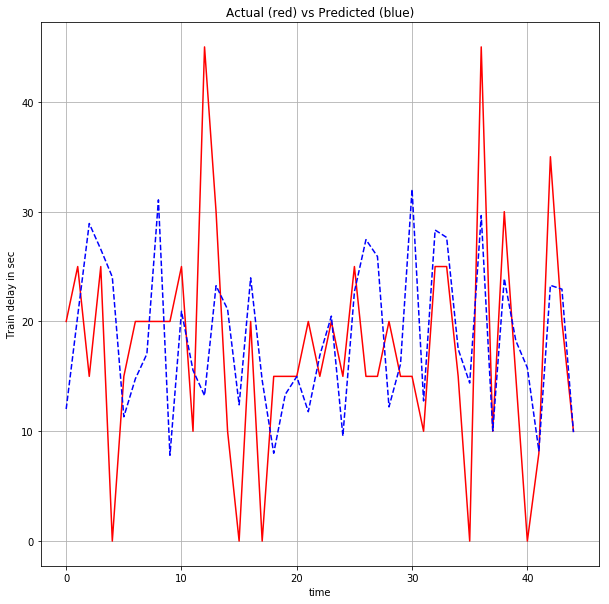

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.plot(test_labels, 'r-', predictions, 'b--')
plt.xlabel('time')
plt.ylabel('Train delay in sec')
plt.title('Actual (red) vs Predicted (blue)')
plt.grid(True)

## Interpreting the Results

Now we have a Regression Model that is 80% accurate on the Test data. We use it to make predictions and see that it follows the trends on the Test data. As we get more data then the model would start learning better patterns and the accuracy would improve. Now we will try to see how much each of the features affects the delay. We see below that Dew Point, Humidity and Temperature are the most relevant factors affecting train delay. So we can use the value of these factors and use our Model to make future delay prediction.

In [128]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: hum_avg              Importance: 0.29
Variable: dewpt_avg            Importance: 0.23
Variable: temp_avg             Importance: 0.21
Variable: WEEKDAY              Importance: 0.15
Variable: press_avg            Importance: 0.13


## Making a future prediction

In [129]:
feature_list = ['WEEKDAY', 'temp_avg', 'dewpt_avg', 'hum_avg','press_avg', 'vis_avg']

# for Mar 6 2018 - looking up weather data
testvals = [[6, 28, 19, 91, 1016]]

print("Expected delay = %.2f minutes"%rf.predict(testvals)[0])

Expected delay = 16.72 minutes


#### Actual delay for the above date was 19 minutes

## 3.3 Reinforcement Machine Learning

Reinforcement Learning is an approach in which we build an AI Agent that interacts with an Environment and learns based on feedback obtained from this interaction. There is no labeled data but data obtained by constantly observing the Environment. The most common application for this is in Games where by looking at different plays the Computer learns to play the game. Now the AI agent you trained starts telling you what move to take at each State of the game. Basically it starts Prescribing actions based on State of the Environment. This is a type of Prescriptive Analytics. We could use this method to learn on historical patterns of human decision making and help suggest actions to take on future events.

![title](Reinforcement_learning_diagram.svg)

## 4. Prescriptive Analytics

We saw in earlier section of AI agents that can be trained to prescribe actions for us. We could build recommender systems that look at data and run complex Analytics to prescribe actions. Could not find a concrete example of same - would love to know your thoughts.

I guess if I can get good at predicting Train delays the next time Alexa can download my favourite Arrested Development episodes and keep them ready to watch at the station. Sorry if you were expecting some grand connection to Arrested Development - but its my favourite series of all time and thats about it.  

![title](arrested_dev.png)